In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
import listoflist

In [194]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [176]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [156]:
df = pd.read_excel("Data Analyst - Test Data.xlsx")

In [157]:
df.head()

,Review,date,Location,Unnamed: 3
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,NaN
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,NaN
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,NaN
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,NaN


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Review      6393 non-null   object        
 1   date        6448 non-null   datetime64[ns]
 2   Location    1711 non-null   object        
 3   Unnamed: 3  0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 201.6+ KB


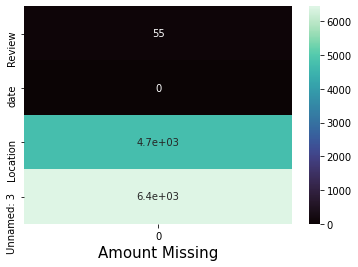

In [159]:
sns.heatmap(df.isna().sum().to_frame(),annot=True,cmap='mako')
plt.xlabel('Amount Missing',fontsize=15)
plt.show()

In [160]:
df.isnull().sum()

Review          55
date             0
Location      4737
Unnamed: 3    6448
dtype: int64

In [161]:
df = df.iloc[:,0:1]

In [162]:
df.head()

,Review
0,I was very impressed with the resort.\n Great ...
1,The rooms were nice the outside needs work als...
2,Great location! I have stayed at this hotel on...
3,The hotel was adequate for my stay. The strips...
4,"Great location, room was large and spacious. P..."


In [163]:
df = df.dropna()

In [164]:
df.isna().sum()

Review    0
dtype: int64

In [165]:
df.reset_index(drop=True, inplace=True)

In [166]:
df.head()

,Review
0,I was very impressed with the resort.\n Great ...
1,The rooms were nice the outside needs work als...
2,Great location! I have stayed at this hotel on...
3,The hotel was adequate for my stay. The strips...
4,"Great location, room was large and spacious. P..."


In [168]:
df.Review[0]

'I was very impressed with the resort. Great staff at the main resort pool bar! We had a blast with them. Clean, professional staff, great location and very reasonable!    Read more  Read less'

In [167]:
df['Review'] = df['Review'].str.replace("\n","")

In [169]:
df['Review'] = df['Review'].str.replace("Read more","")

In [170]:
df['Review'] = df['Review'].str.replace("Read less","")

In [172]:
import re
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [174]:
df.Review.head()

0    I was very impressed with the resort Great sta...
1    The rooms were nice the outside needs work als...
2    Great location I have stayed at this hotel on ...
3    The hotel was adequate for my stay The strips ...
4    Great location room was large and spacious Par...
Name: Review, dtype: object

In [177]:
def senti(review):
    if sid.polarity_scores(review)['compound'] >= 0:
        return 'pos'
    else:
        return 'neg'

In [179]:
df['sentiment'] = df['Review'].apply(lambda x: senti(x))

In [180]:
df.head()

,Review,sentiment
0,I was very impressed with the resort Great sta...,pos
1,The rooms were nice the outside needs work als...,pos
2,Great location I have stayed at this hotel on ...,pos
3,The hotel was adequate for my stay The strips ...,pos
4,Great location room was large and spacious Par...,pos


<AxesSubplot:xlabel='sentiment', ylabel='count'>

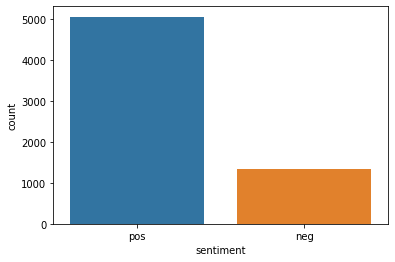

In [181]:
sns.countplot(x='sentiment',data=df)

In [196]:
def pos_tagging(data):
    req_tag = ['NN']
    extracted_words = []
    i = 0
    try:
        for x in data['Review']:
            doc = nlp(x)
            for token in doc:
                i += 1
                if token.tag_ in req_tag and token.shape_ != 'x' and token.shape_ != 'xx' and token.shape_ != 'xxx':
                    extracted_words.append(token.lemma_)
        return extracted_words
    except Exception as e:
        return extracted_words

In [197]:
extracted_words = pos_tagging(df)

In [241]:
ser = pd.Series(extracted_words).value_counts().head(10)
index = ser.index
value = ser.values

In [286]:
index

Index(['room', 'hotel', 'staff', 'location', 'service', 'time', 'night',
       'desk', 'parking', 'stay'],
      dtype='object')

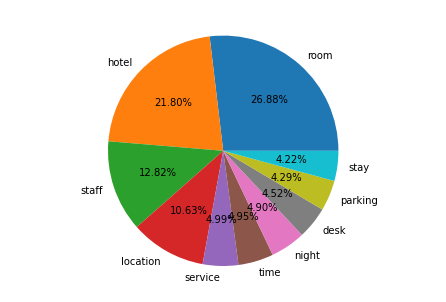

In [242]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
freq = index
val = value
ax.pie(val, labels = freq,autopct='%1.2f%%')
plt.show()

In [221]:
aspect = []
description = []

for sentence in df['Review']:
    doc = nlp(sentence)
    descriptive_term = ''
    target = ''
    for token in doc:
        if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
            target = token.text
        if token.pos_ == 'ADJ':
            prepend = ''
            for child in token.children:
                if child.pos_ != 'ADV':
                    continue
                prepend += child.text + ' '
            descriptive_term = prepend + token.text
    aspect.append(target)
    description.append(descriptive_term)

In [222]:
df['aspect'] = aspect
df['description'] = description

In [223]:
df.head()

,Review,sentiment,aspect,description
0,I was very impressed with the resort Great sta...,pos,,very reasonable
1,The rooms were nice the outside needs work als...,pos,rooms,overall
2,Great location I have stayed at this hotel on ...,pos,,last
3,The hotel was adequate for my stay The strips ...,pos,strips,nice
4,Great location room was large and spacious Par...,pos,room,friendly


In [230]:
df['aspect'] = df['aspect'].str.replace('beds','bed')
df['aspect'] = df['aspect'].str.replace('rooms','room')

In [231]:
df['aspect'].value_counts().head(10)

            1889
room         528
staff        341
hotel        302
location     161
bed           98
service       67
place         62
property      62
area          55
Name: aspect, dtype: int64

In [236]:
new = df[(df['aspect'] == 'room') | (df['aspect'] == 'staff') | (df['aspect'] == 'hotel') |(df['aspect'] == 'location') | (df['aspect'] == 'bed') |(df['aspect'] == 'service')][['sentiment','aspect']]

<AxesSubplot:xlabel='aspect', ylabel='count'>

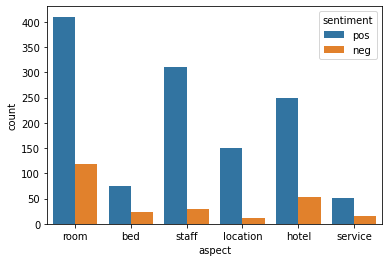

In [237]:
sns.countplot(x='aspect',data=new, hue='sentiment')

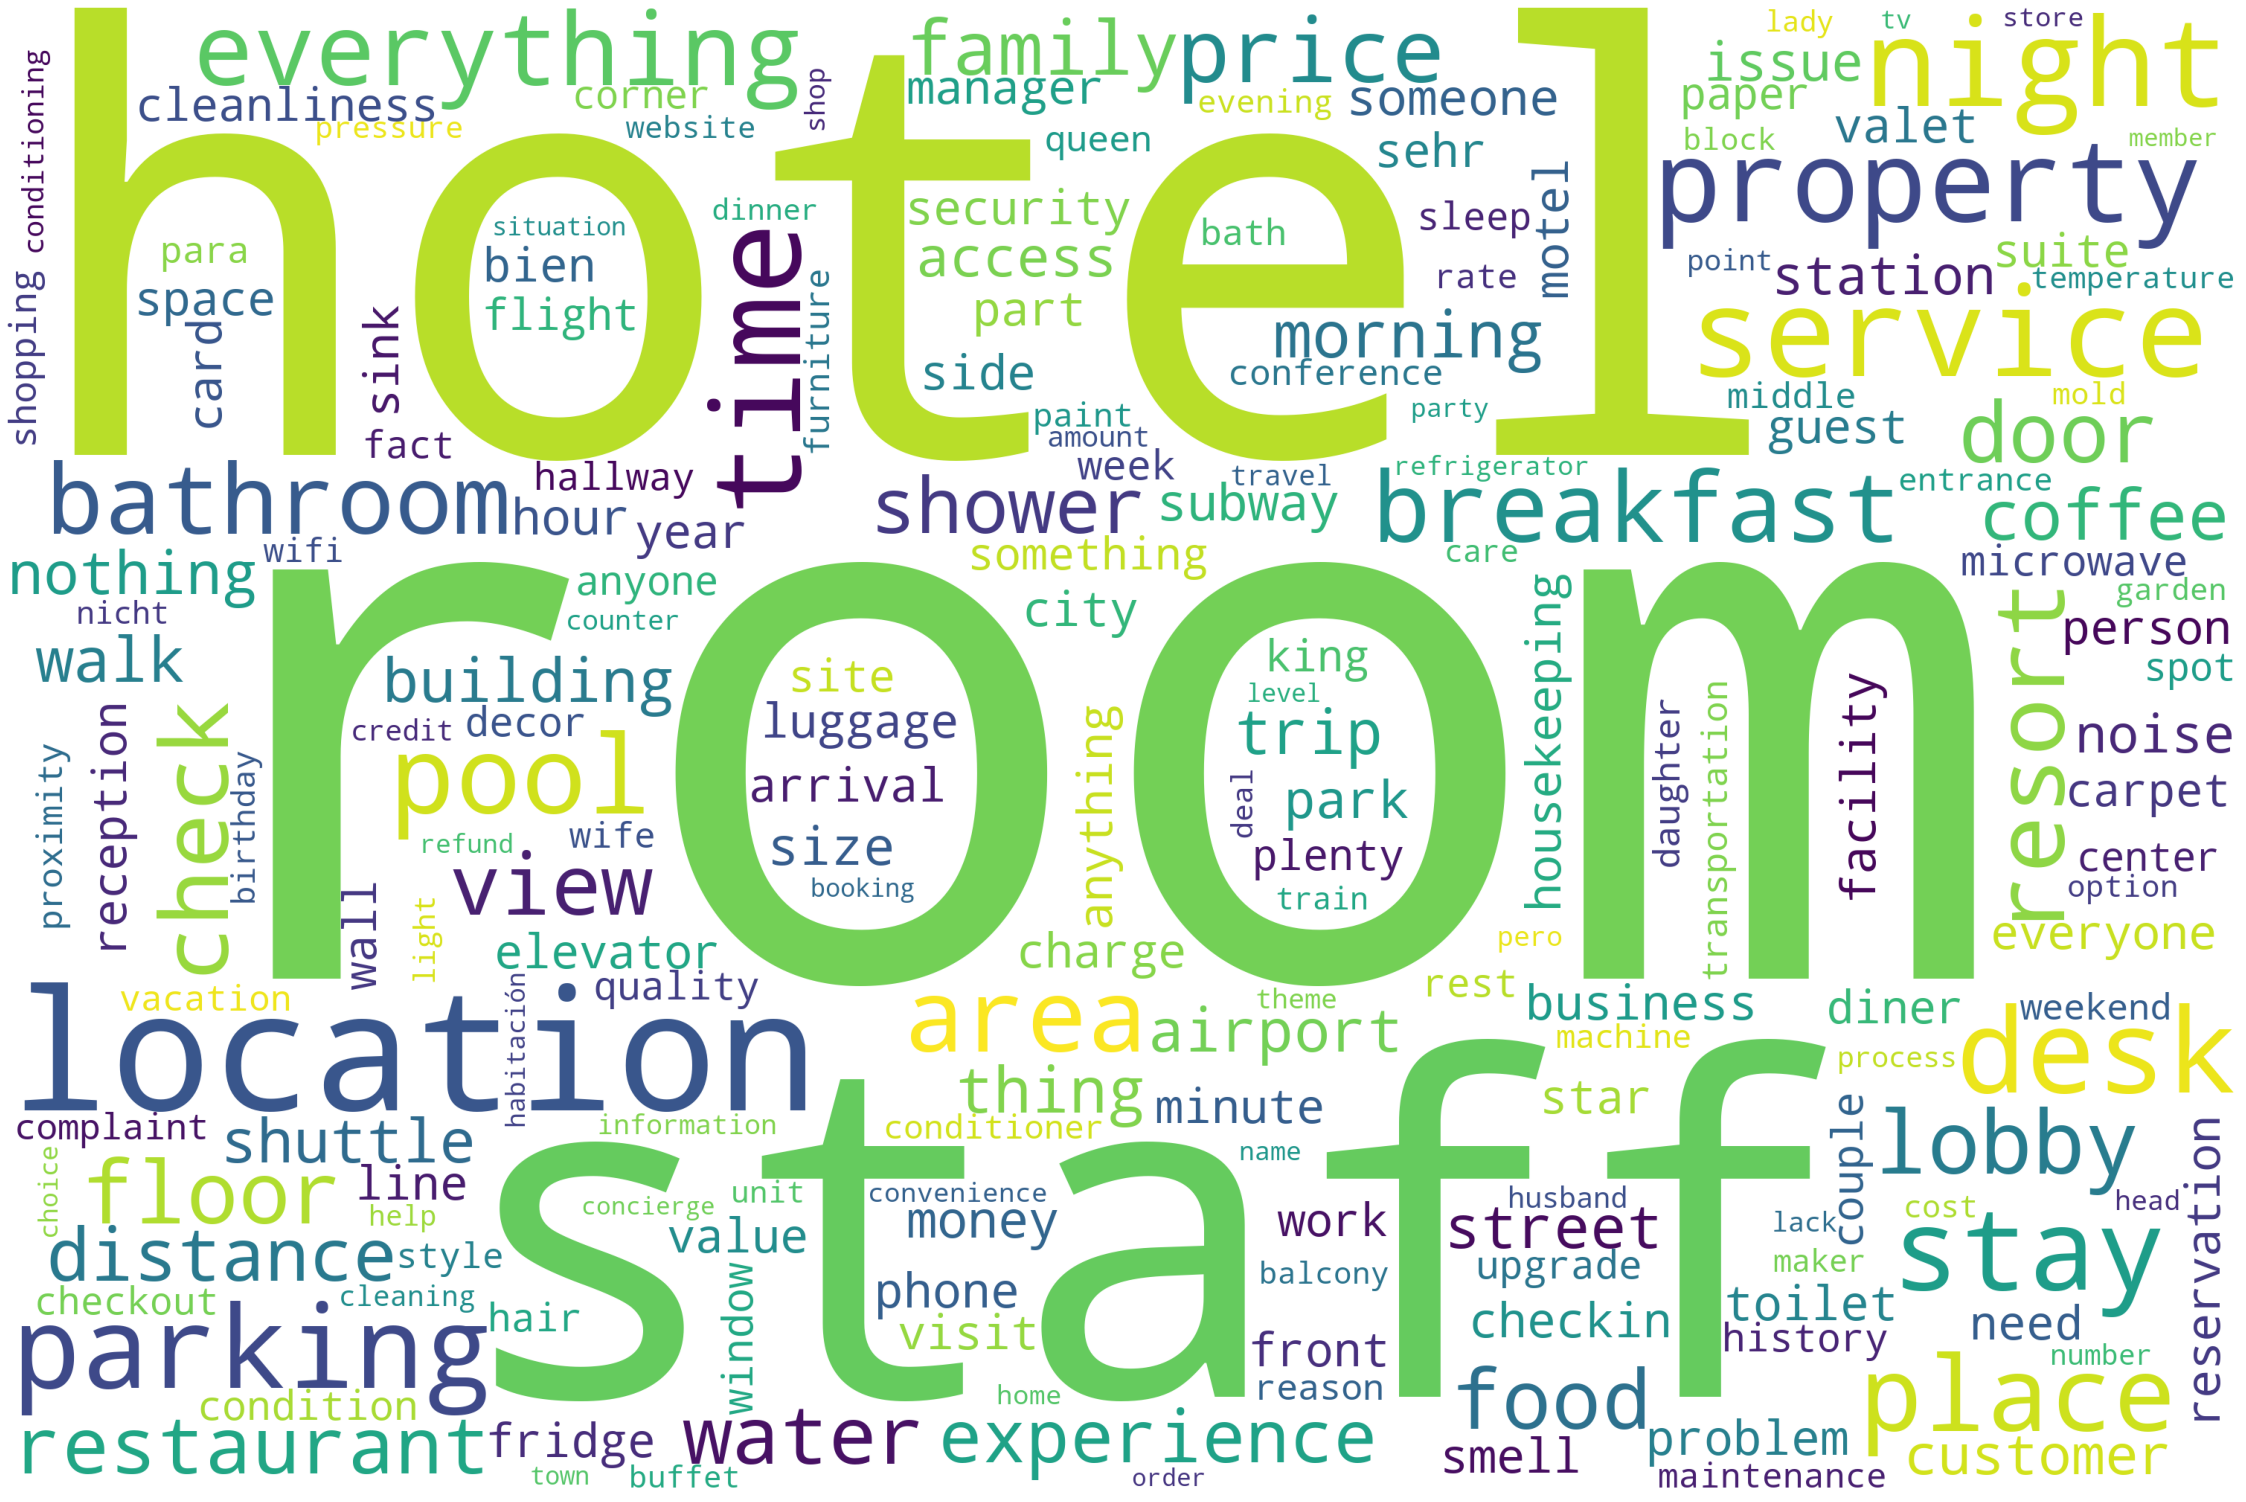

In [249]:
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")
unique_string=(" ").join(extracted_words)   
wordcloud = WordCloud(width = 3000, height = 2000,background_color='white',random_state=1, collocations=False, stopwords = STOPWORDS).generate(unique_string)

plot_cloud(wordcloud)

In [254]:
from geopy.geocoders import Nominatim


' Česko'

In [255]:
df2 = pd.read_excel("Data Analyst - Test Data.xlsx")

In [256]:
df2.head()

,Review,date,Location,Unnamed: 3
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,NaN
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,NaN
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,NaN
3,The hotel was adequate for my stay. The strips...,2019-08-20,NaN,NaN
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,NaN


In [257]:
df2 = df2.iloc[:,:-1]

In [259]:
df2 = df2.dropna()

In [261]:
df2.isna().sum()

Review      0
date        0
Location    0
dtype: int64

In [263]:
len(df2)

1705

In [268]:
geolocator = Nominatim(user_agent = "geoapiExcercises")
def country(names):
    c = []
    for name in names:
        location = geolocator.geocode(name)
        country = str(location).split(",")[-1]
        c.append(country.strip())
    return c
    

In [272]:
co = country(df2['Location'])

In [274]:
df2['Country'] = co

In [281]:
df2['sentiment'] = df2['Review'].apply(lambda x: senti(x))

In [282]:
df2.head()

,Review,date,Location,Country,sentiment
0,I was very impressed with the resort.\n Great ...,2019-08-20,Sebastian,United States,pos
1,The rooms were nice the outside needs work als...,2019-08-20,Los Angeles,United States,pos
2,Great location! I have stayed at this hotel on...,2019-08-20,Georgia,United States,pos
4,"Great location, room was large and spacious. P...",2019-08-19,Palm Harbor,United States,pos
10,Very clean and friendly and I love the locatio...,2019-08-19,California,United States,pos


In [283]:
df2['Country'].value_counts()

United States                  1225
Canada                          124
United Kingdom                   85
Deutschland                      25
Italia                           23
                               ... 
België / Belgique / Belgien       1
საქართველო                        1
El Salvador                       1
Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب           1
مصر                               1
Name: Country, Length: 72, dtype: int64

In [284]:
new_df2 = df2[(df2['Country'] == 'United States') | (df2['Country'] == 'Canada') | (df2['Country'] == 'United Kingdom') | (df2['Country'] == 'Deutschland') | (df2['Country'] == 'Italia')]

<AxesSubplot:xlabel='Country', ylabel='count'>

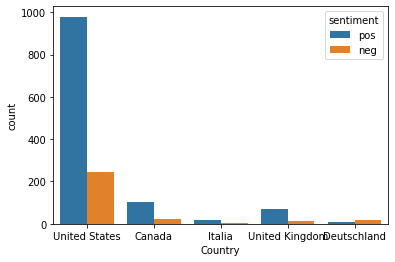

In [285]:
sns.countplot(x='Country',data=new_df2,hue='sentiment')